In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [5]:
dataFrame1=pd.read_csv('Bengaluru_House_Data.csv')
dataFrame1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
dataFrame1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
dataFrame2=dataFrame1.drop(['area_type','availability','society'],axis='columns')
dataFrame2.head(10)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00


In [8]:
dataFrame2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
dataFrame2['balcony'] = dataFrame2['balcony'].fillna(dataFrame2['balcony'].median())
dataFrame2.head(10)

# Median found = 2.0

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,2.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.00
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,2.0,370.00


In [10]:
dataFrame2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
dataFrame2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [12]:
dataFrame3 = dataFrame2.dropna()

In [13]:
dataFrame3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
dataFrame3['BHK'] = dataFrame3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\PRAYAG\AppData\Local\Temp/ipykernel_37056/1919936028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame3['BHK'] = dataFrame3['size'].apply(lambda x:int(x.split(' ')[0]))


In [15]:
dataFrame3.head(10)

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,2.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,2.0,370.00,6


In [16]:
dataFrame3.drop('size', axis=1, inplace=True)

c:\python\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
dataFrame3.head(10)

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
5,Whitefield,1170,2.0,1.0,38.00,2
6,Old Airport Road,2732,4.0,2.0,204.00,4
7,Rajaji Nagar,3300,4.0,2.0,600.00,4
8,Marathahalli,1310,3.0,1.0,63.25,3
9,Gandhi Bazar,1020,6.0,2.0,370.00,6


In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
dataFrame3[~dataFrame3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [20]:
dataFrame3.location = dataFrame3.location.apply(lambda x: x.strip())

loc_stats=dataFrame3.groupby('location')['location'].agg('count').sort_values(ascending=False)

loc_stats

c:\python\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [21]:
def convert_sqft_to_num(x):
    x=str(x)
    tokens=x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df4=dataFrame3.copy()
df4['total_sqft'] = dataFrame3['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(31)
df4.shape

(13200, 6)

In [23]:
df4.shape

(13200, 6)

In [24]:
df4.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [25]:
def unit_in_sqmt(x):
    x=str(x)
    if 'Sq. Meter' in x:
        x=x[:-9]
        return float(int(float(x)*10.76))
    elif 'Sq. Yards' in x:
        x=x[:-9]
        return float(int(float(x)*9))
    elif 'Acres' in x:
        x=x[:-5]
        return float(int(float(x)*43560))
    elif 'Cents' in x:
        x=x[:-5]
        return float(int(float(x)*435.56))
    else:
        return x

In [26]:
unit_in_sqmt('5.31Acres')

231303.0

In [28]:
df5=df4.copy()
df5['total_sqft'] = df5['total_sqft'].apply(unit_in_sqmt)
#df5.loc[2310]

In [29]:
df5=df4[~df4['total_sqft'].apply(is_float)].head(10)

In [36]:
df5.shape

(0, 6)

In [37]:
df6=df4.copy()
df6[~df6['total_sqft'].apply(is_float)].head(10)
df6.shape

(13200, 6)

In [38]:
df6.head(25)
df7=df6.copy()

In [39]:
def convert_to_float(x):
    return float(x)
df7['total_sqft'] = df7['total_sqft'].apply(convert_to_float)

In [40]:
df7.shape

(13200, 6)

In [41]:
#type(df7.loc[551]['total_sqft'])
df8=df7.copy()
df8['price_per_sqft']=df8['price']*100000/df8['total_sqft']
df8.head(10)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,Gandhi Bazar,1020.0,6.0,2.0,370.00,6,36274.509804


In [42]:
df8.location = df8.location.apply(lambda x: x.strip())

loc_stats=df8.groupby('location')['location'].agg('count').sort_values(ascending=False)

loc_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [43]:
loc_less_than_10 = loc_stats[loc_stats<=10]
loc_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [44]:
df8.location=df8.location.apply(lambda x:'other' if x in loc_less_than_10 else x)

In [45]:
len(df8.location.unique())

241

In [46]:
loc_stats=df8.groupby('location')['location'].agg('count').sort_values(ascending=False)

loc_stats

location
other                 2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Pattandur Agrahara      11
Banjara Layout          11
HAL 2nd Stage           11
Doddaballapur           11
Kodigehalli             11
Name: location, Length: 241, dtype: int64

In [47]:
df8.shape

(13200, 7)

In [48]:
df8['total_sqft'].sort_values(ascending=False).head(int(len(df8)*(10/100)))

1894     52272.0
5393     42000.0
5469     36000.0
674      35000.0
12987    30400.0
          ...   
8254      2400.0
5225      2400.0
1654      2400.0
3509      2400.0
4684      2400.0
Name: total_sqft, Length: 1320, dtype: float64

In [49]:
df8.loc[4086]

location          Sarjapur  Road
total_sqft                   1.0
bath                         4.0
balcony                      2.0
price                      120.0
BHK                            4
price_per_sqft        12000000.0
Name: 4086, dtype: object

In [50]:
#outlier box-plot graph

def plt_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

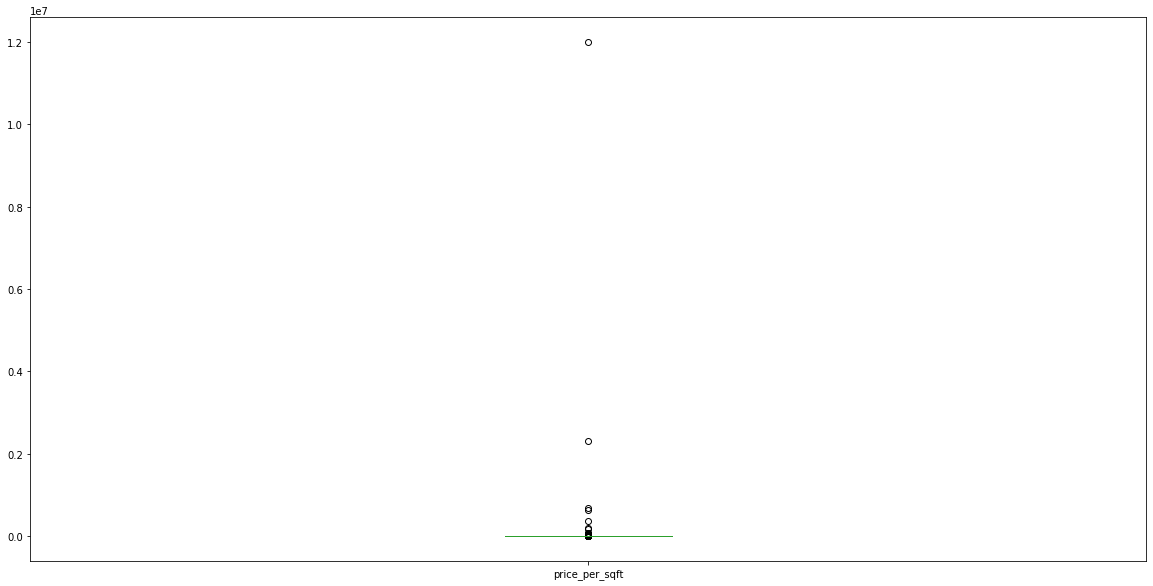

In [51]:
plt_boxplot(df8,'price_per_sqft')

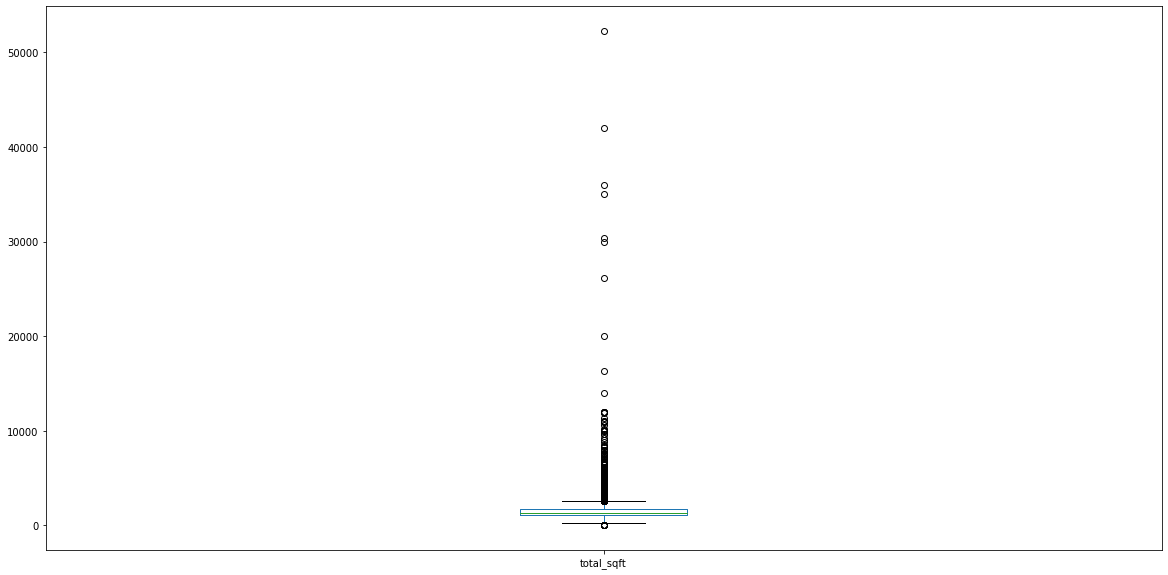

In [52]:
plt_boxplot(df8,'total_sqft')

In [53]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    print('q1',Q1,'q3',Q3)
    IQR = Q3-Q1
    
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    
    print('low',lower,'up',upper)
    
    ls = df.index [ (df[ft]< lower) | (df[ft] > upper) ]
    
    return ls

In [54]:
index_list=[]

for feature in ['price_per_sqft']:                #### To be changed --> only remove outliers from price_per_sqft.
    index_list.extend(outliers(df8,feature))
    
index_set=set(index_list)
index_list=list(index_set)

q1 4267.701345223347 q3 7317.073170731707
low -306.3563930391938 up 11891.130908994248


In [56]:
index_list=[]

for feature in ['total_sqft','price_per_sqft']:
    index_list.extend(outliers(df8,feature))
    
index_set=set(index_list)
#print(index_set)
index_list=list(index_set)

q1 1100.0 q3 1672.0
low 242.0 up 2530.0
q1 4267.701345223347 q3 7317.073170731707
low -306.3563930391938 up 11891.130908994248


In [57]:
df9=df8.drop(index_list)

In [58]:
len(index_list)

2154

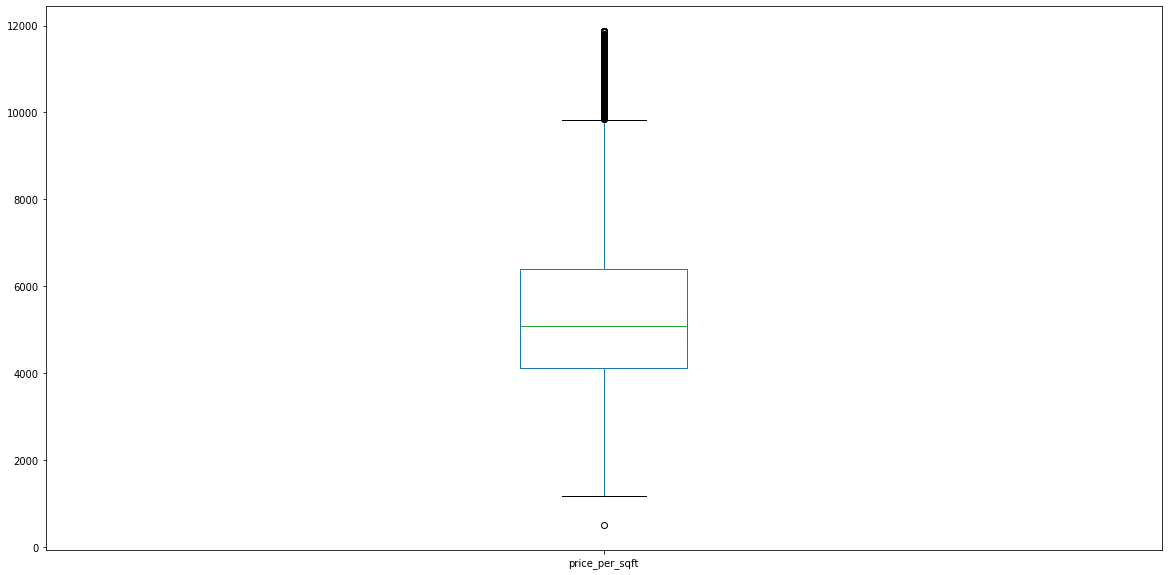

In [59]:
plt_boxplot(df9,'price_per_sqft')

In [60]:
index_list=[]

for feature in ['total_sqft','price_per_sqft']:
    index_list.extend(outliers(df9,feature))
    
index_set=set(index_list)
#print(index_set)
index_list=list(index_set)
#print(index_list)

q1 1088.0 q3 1530.0
low 425.0 up 2193.0
q1 4108.151144775349 q3 6402.402607996457
low 666.7739499436875 up 9843.779802828118


In [62]:
print(len(index_list))

834


In [63]:
df8.shape
df9.shape

(11046, 7)

In [64]:
df9 = df8[~(df8.total_sqft/df8.BHK<300)]
df9.shape

(12456, 7)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

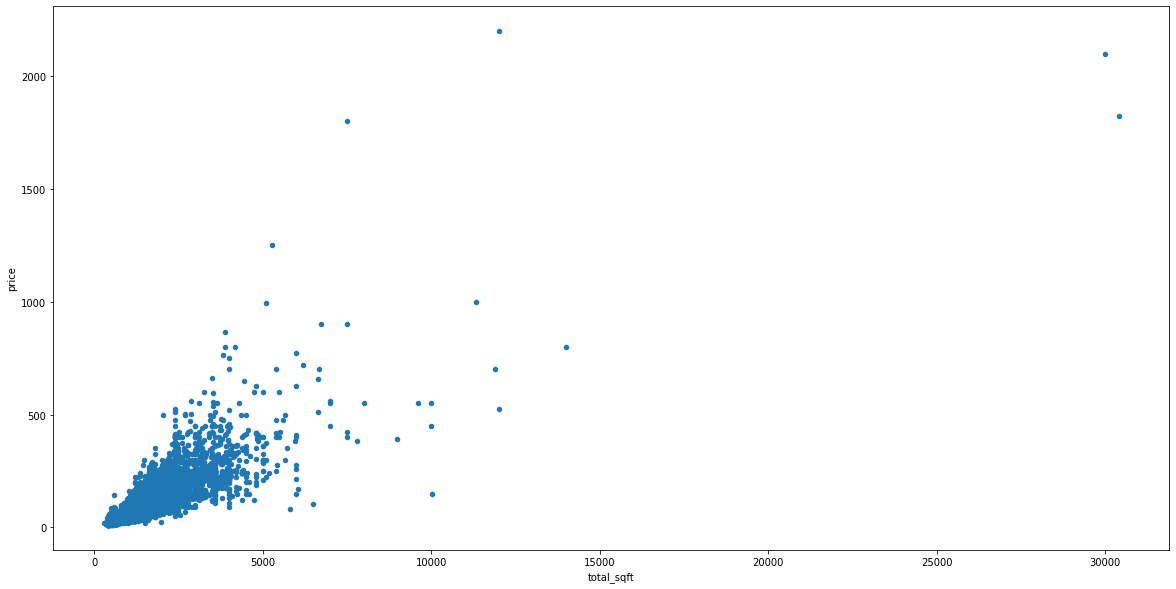

In [67]:
df10.plot.scatter(x='total_sqft',y='price')

In [68]:
#df10.loc[58]

In [69]:
df8.loc[58]

location          Murugeshpalya
total_sqft               1407.0
bath                        4.0
balcony                     1.0
price                     150.0
BHK                           6
price_per_sqft      10660.98081
Name: 58, dtype: object

In [71]:
df9.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [72]:
df9.shape

(12456, 7)

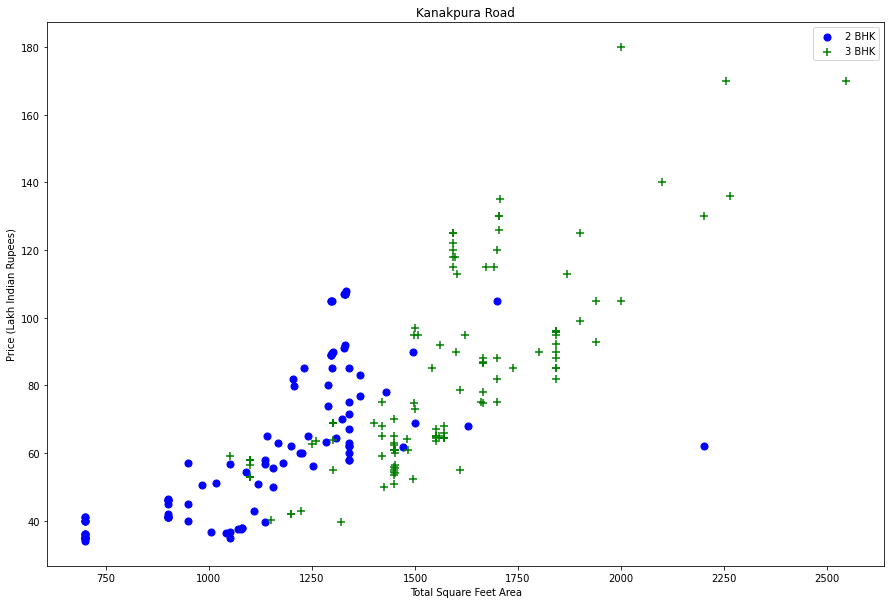

In [73]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df9,"Kanakpura Road")

In [74]:
loc_stats=df10.groupby('location')['location'].agg('count').head(100)

loc_stats

location
1st Block Jayanagar            7
1st Phase JP Nagar            20
2nd Phase Judicial Layout      8
2nd Stage Nagarbhavi           6
5th Block Hbr Layout           6
                            ... 
Harlur                        71
Hebbal                       130
Hebbal Kempapura              24
Hegde Nagar                   34
Hennur                        46
Name: location, Length: 100, dtype: int64

In [75]:
2+5

7

In [76]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df10 = remove_pps_outliers(df9)
df10.shape

(10242, 7)

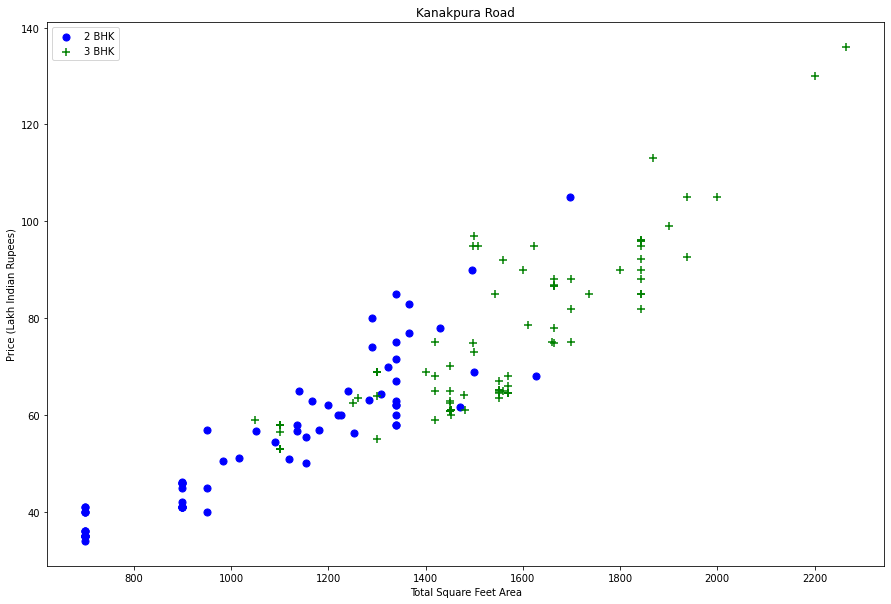

In [77]:
plot_scatter_chart(df10,"Kanakpura Road")

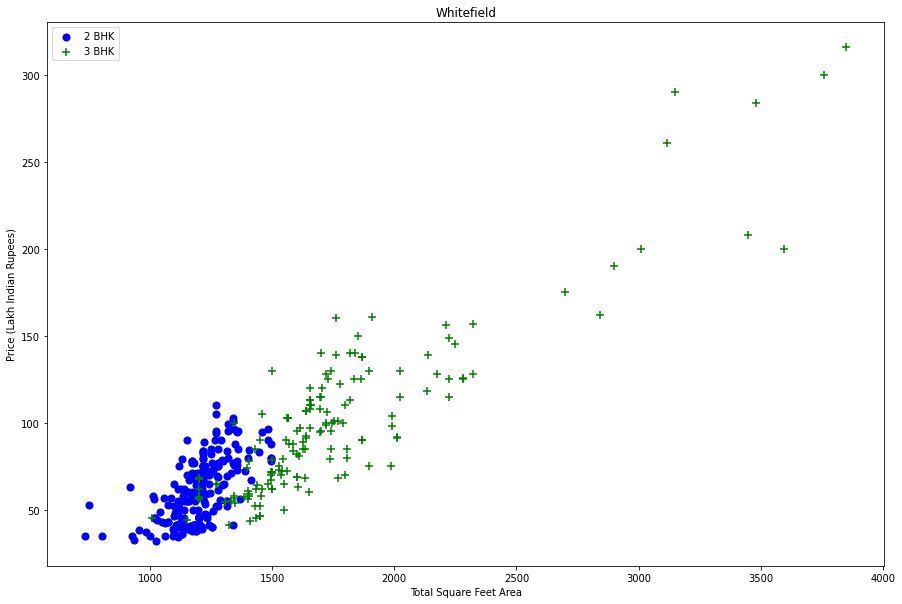

In [78]:
plot_scatter_chart(df10,"Whitefield")

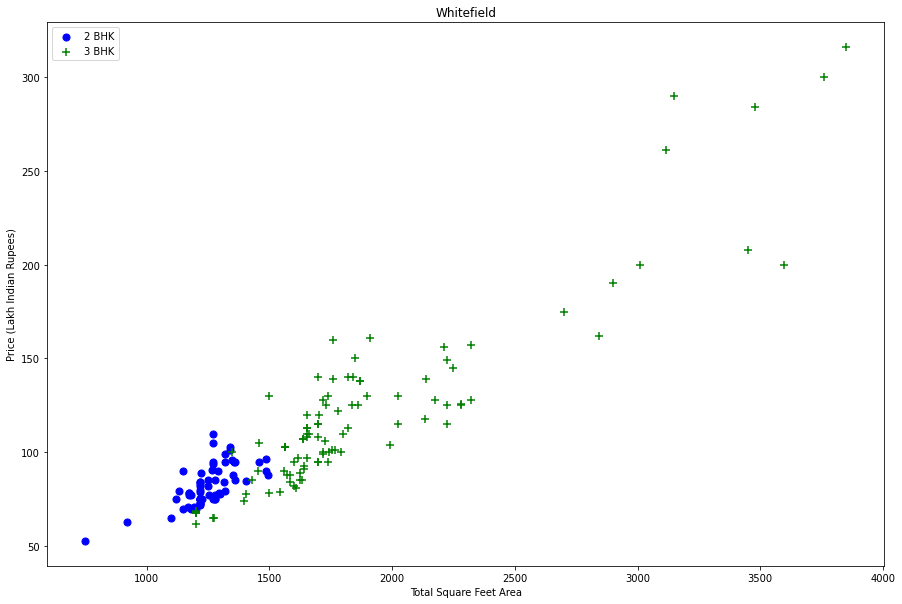

In [81]:
plot_scatter_chart(df11,"Whitefield")

Text(0, 0.5, 'Count')

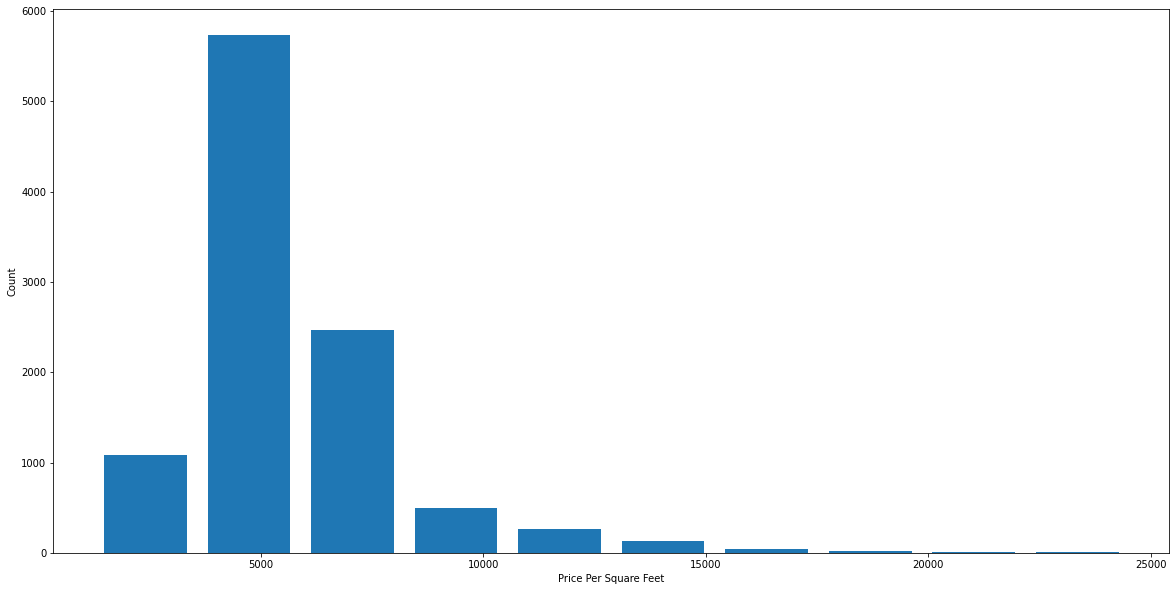

In [82]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df10.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [83]:
df10.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

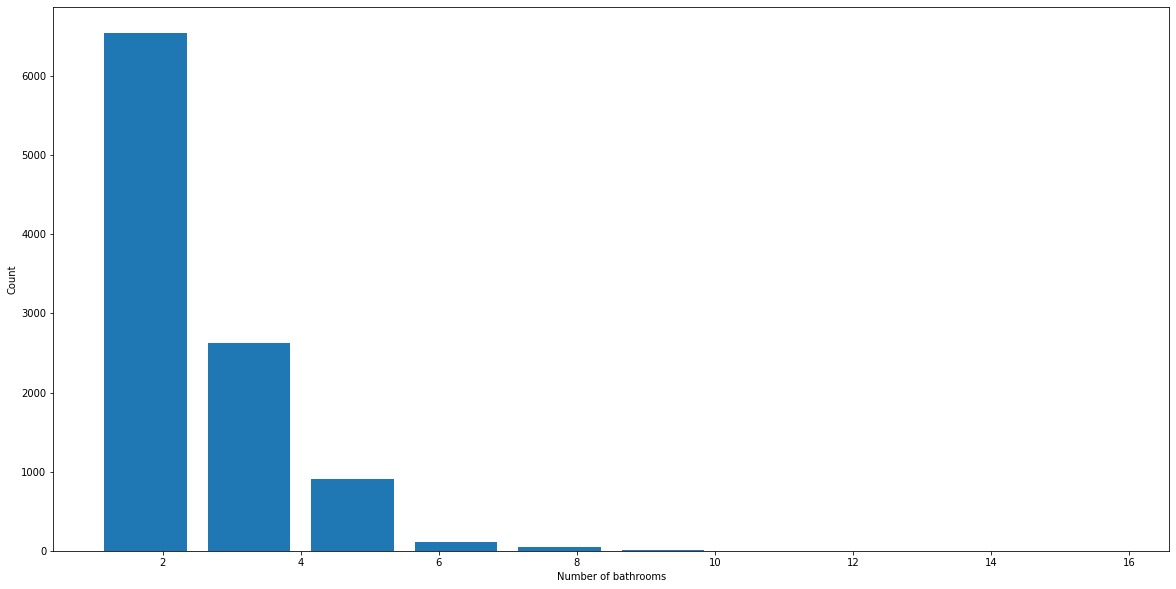

In [84]:
plt.hist(df10.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [85]:
df9.loc[3609]

location            other
total_sqft        10000.0
bath                 16.0
balcony               2.0
price               550.0
BHK                    16
price_per_sqft     5500.0
Name: 3609, dtype: object

In [80]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df11 = remove_bhk_outliers(df10)
# df8 = df7.copy()
df11.shape

(7317, 7)

In [86]:
df12 = df11[df11.bath<df11.BHK+2]
df12.shape

(7239, 7)

Text(0, 0.5, 'Count')

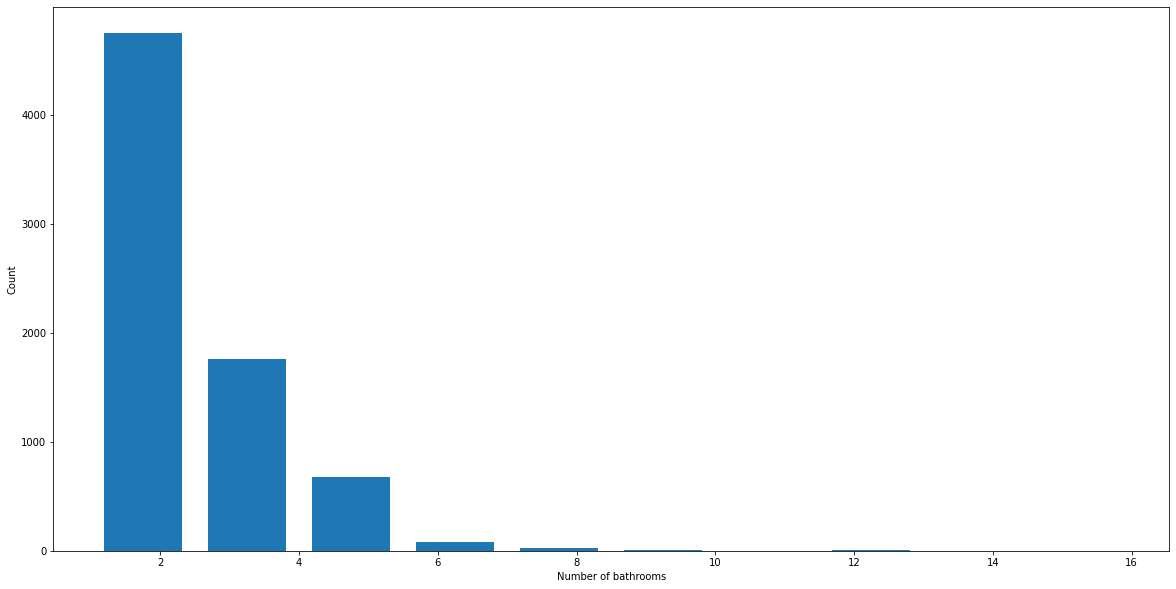

In [87]:
plt.hist(df11.bath,rwidth=0.75)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [88]:
df13 = df12.drop(['price_per_sqft'],axis='columns')
df13.head(3)

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


In [89]:
dummies = pd.get_dummies(df13.location)

In [90]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df12.loc[2]

location          1st Block Jayanagar
total_sqft                     1875.0
bath                              2.0
balcony                           3.0
price                           235.0
BHK                                 3
price_per_sqft           12533.333333
Name: 2, dtype: object

In [92]:
df14 = pd.concat([df13,dummies.drop('other',axis='columns')],axis='columns')
df14.head()

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df13.head(10)

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3


In [94]:
df15=df14.drop(['location'],axis='columns')
df15.head()

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X = df15.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
Y = df15.price
Y.head()
Y.shape

(7239,)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [98]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8627544539871583

In [99]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.82692336, 0.86034085, 0.85325973, 0.84368542, 0.85485344])

In [102]:
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.847813,{'normalize': False}
1,lasso,0.726811,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.697961,"{'criterion': 'mse', 'splitter': 'random'}"


In [103]:
from sklearn.ensemble import RandomForestRegressor
Rf_clf = RandomForestRegressor()
Rf_clf.fit(X_train,Y_train)
Rf_clf.score(X_test,Y_test)

0.7820189412602949